In [1]:
# Useful starting lines - HARD NECESSAIRE
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [85]:
# HARD NECESSAIRE
from proj1_helpers import *
testY,testX,idTest=load_csv_data("../../dataset/test.csv", sub_sample=False)
trainY,trainX,idTrain=load_csv_data("../../dataset/train.csv", sub_sample=False)

In [86]:
# NECESSAIRE (MAIS TEST AVEC ET SANS EST UN PLUS)
trainX[trainX==-999]=np.nan
testX[testX==-999]=np.nan
meanTrain=np.nanmean(trainX,axis=0)
meanTest=np.nanmean(testX,axis=0)
indsTrain = np.where(np.isnan(trainX))
indsTest = np.where(np.isnan(testX))
trainX[indsTrain]=np.take(meanTrain,indsTrain[1])
testX[indsTest]=np.take(meanTest,indsTest[1])

Find linearly dependant column

In [87]:
# DOIT FAIRE TEST AVEC ET SANS
for i in range(trainX.shape[1]):
    if(not np.any(trainX[:,i]<=0)):
        trainX[:,i]=np.log(trainX[:,i])
for i in range(testX.shape[1]):
    if(not np.any(testX[:,i]<=0)):
        testX[:,i]=np.log(testX[:,i])

In [88]:
# NECESSAIRE (MAIS TEST AVEC ET SANS EST UN PLUS)
meanTrain=np.nanmean(trainX,axis=0)
meanTest=np.nanmean(testX,axis=0)
stdTrain=np.std(trainX,axis=0)
stdTest=np.std(testX,axis=0)
trainX=(trainX-meanTrain)/stdTrain
testX=(testX-meanTest)/stdTest

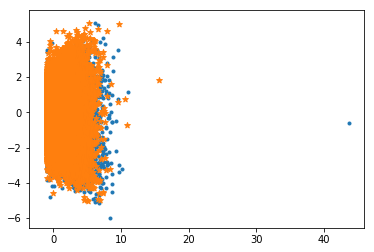

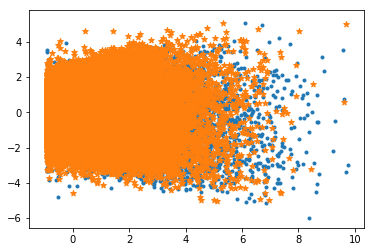

In [5]:
#remove outliers - HARD NECESSAIRE (FUNCTION)
def reject_outliers(data, m=10):
    newData=np.copy(data)
    ind=abs(data - np.mean(data,axis=0)) > m * np.std(data,axis=0)
    newData[ind]=0
    return newData
    
deg1=3
deg2=10
    
bla=reject_outliers(trainX)
plt.scatter(trainX[np.where(trainY==1),deg1],trainX[np.where(trainY==1),deg2],marker='.')
plt.scatter(trainX[np.where(trainY==-1),deg1],trainX[np.where(trainY==-1),deg2],marker='*')
plt.figure()
plt.scatter(bla[np.where(trainY==1),deg1],bla[np.where(trainY==1),deg2],marker='.')
plt.scatter(bla[np.where(trainY==-1),deg1],bla[np.where(trainY==-1),deg2],marker='*')

In [89]:
# NECESSAIRE (MAIS TEST AVEC ET SANS EST UN PLUS)
trainX=reject_outliers(trainX)
testX=reject_outliers(testX)

In [7]:
# NEED ONLY WITH GD
initial_w=np.zeros((30,))
initial_w0=np.zeros((31,))
max_iters=500
gamma=3e-7
#lambda_=10
#degree=4

In [6]:
# NOPE NEVER
trainX=np.delete(trainX,22,1)
testX=np.delete(testX,22,1)

c:\python35\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


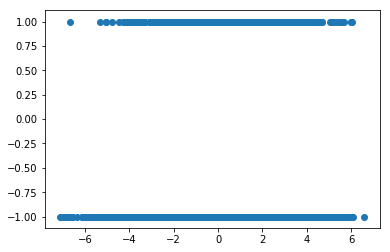

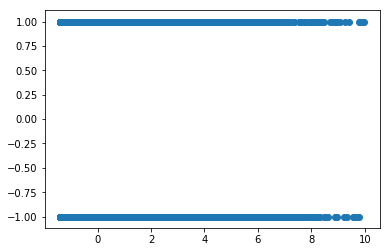

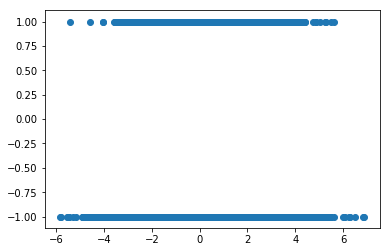

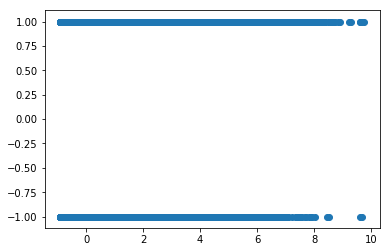

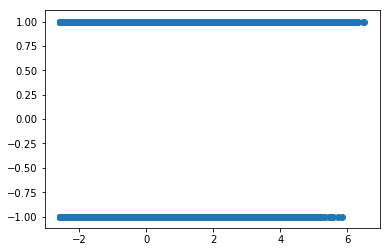

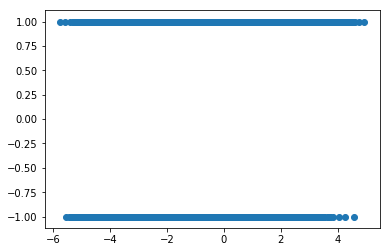

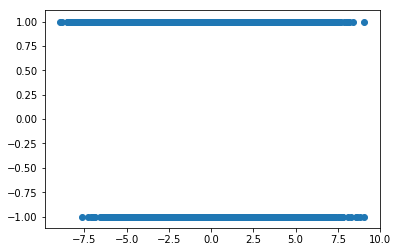

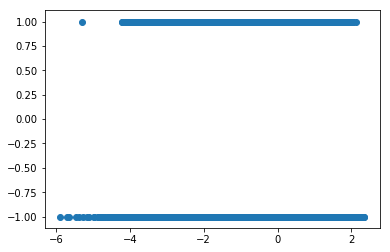

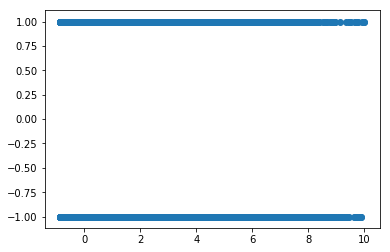

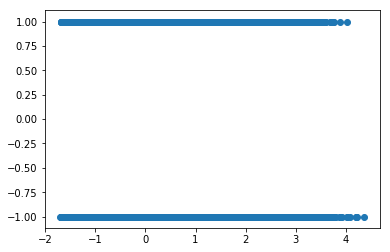

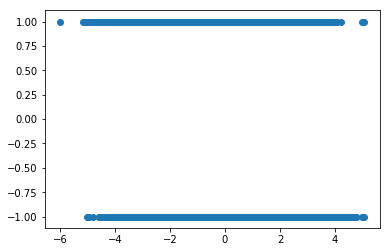

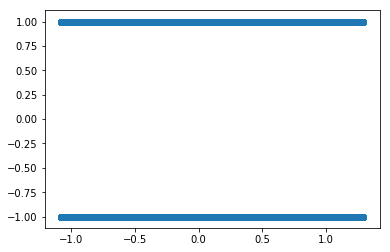

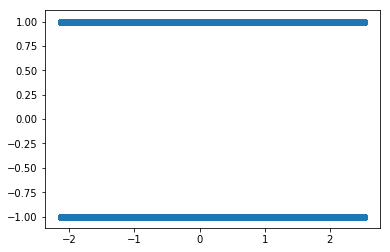

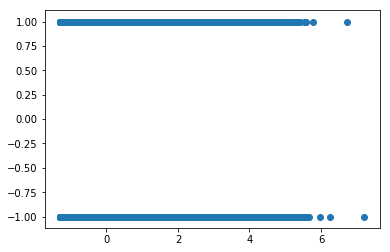

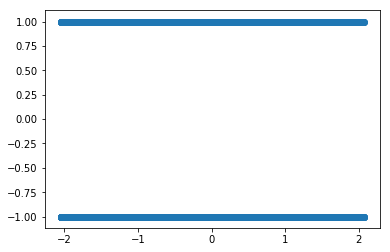

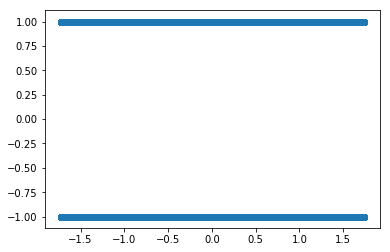

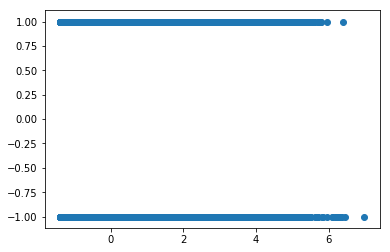

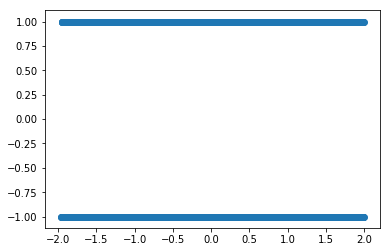

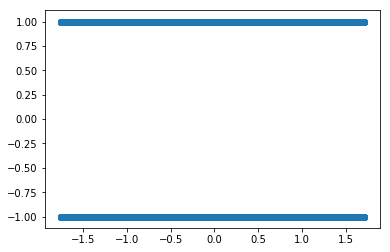

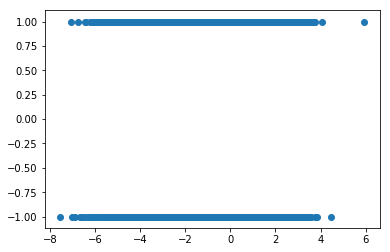

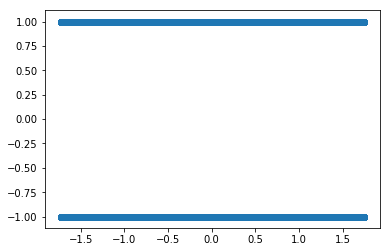

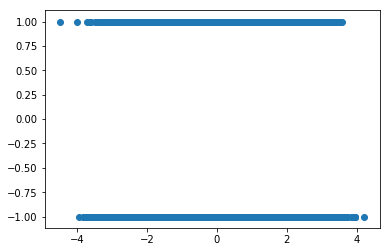

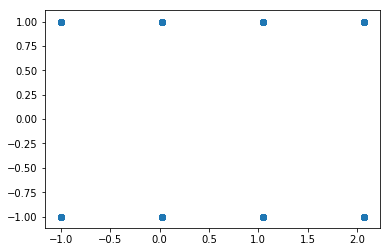

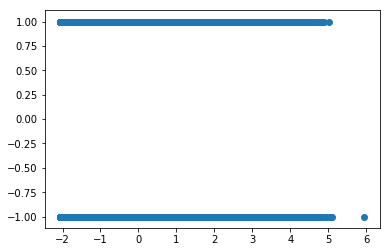

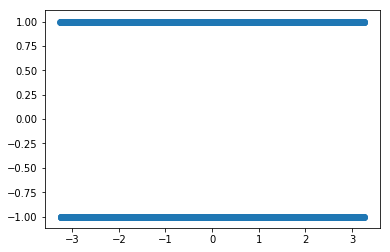

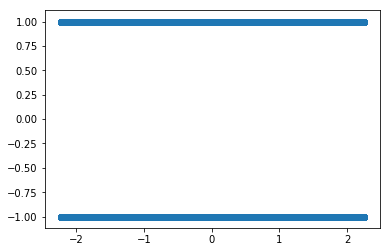

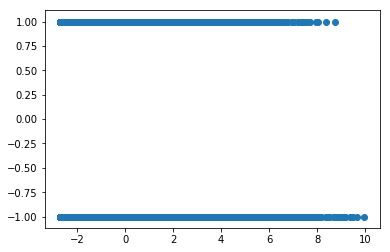

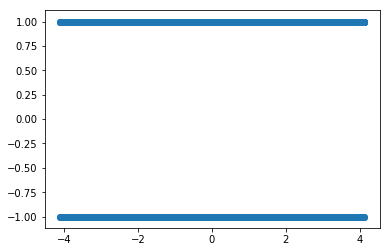

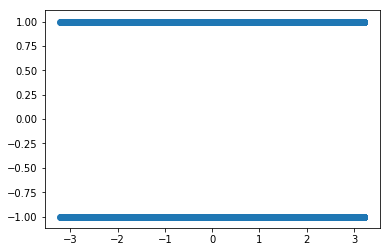

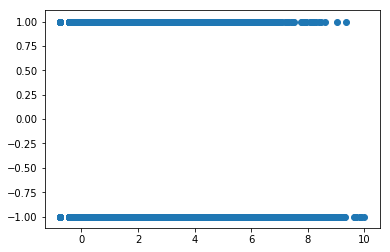

In [8]:
# USELESS FOR TEST
# 4,6,7,11,12,14,15,18,20,22,24,25,27,28 is useless?
for i in range(trainX.shape[1]):
    plt.figure(i)
    plt.scatter(trainX[:,i],trainY[:])

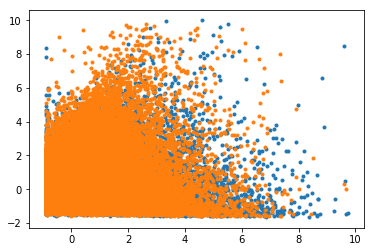

In [59]:
#USELESS FOR TEST
deg1=3
deg2=10
plt.scatter(trainX[np.where(trainY==1),deg1],trainX[np.where(trainY==1),deg2],marker='.')
plt.scatter(trainX[np.where(trainY==-1),deg1],trainX[np.where(trainY==-1),deg2],marker='.')

Need to make a train-test split of train data to cross-validate, with a symmetric number of y

In [10]:
#USELESS FOR PRELIMINARY TEST 
np.random.seed(2)
from split_data import *
tr_trainX,tr_trainY,tr_testX,tr_testY=split_data(trainX,trainY,0.5)

In [11]:
# HARD NECESSAIRE
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [79]:
#HARD NECESSAIRE
from costs import compute_mse

def cross_validation(y, x, k_indices, k, lambda_):
    """return the loss of ridge regression."""
    test_ind=k_indices[k]
    train_ind=k_indices[[i for i in range(k_indices.shape[0]) if i!=k]]
    train_ind=train_ind.reshape(-1)
    
    y_train=y[train_ind]
    y_test=y[test_ind]
    x_train=x[train_ind,:]
    x_test=x[test_ind,:]

    #tx_train=build_poly(x_train,degree)
    #tx_test=build_poly(x_test,degree)

    w,loss_tr=ridge_regression(y_train,x_train,lambda_)

    loss_te=compute_mse(y_test,x_test,w)
    return loss_tr, loss_te

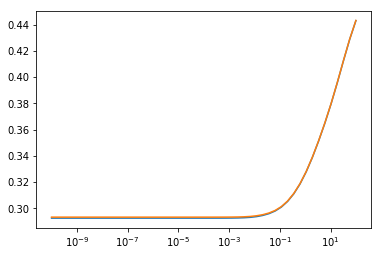

In [46]:
# NOPE
degree=4
seed = 1
k_fold = 4
lambdas= np.logspace(-10, 2, 50)
k_indices = build_k_indices(trainY, k_fold, seed)


losses=[]
losses_te=[]
tx = build_poly(trainX,degree)

for lambda_ in lambdas:
    temp_tr=[]
    temp_te=[]
    for k in range(k_fold):
        tr,te=cross_validation(trainY,tx,k_indices,k,lambda_,degree)
        temp_tr.append(tr)
        temp_te.append(te)
    losses.append(np.mean(temp_tr))
    losses_te.append(np.mean(temp_te))
    #add np.std test pour rapport
plt.semilogx(lambdas,losses)
plt.semilogx(lambdas,losses_te)

2.5595479226995334e-06

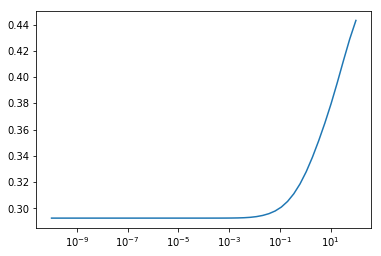

In [47]:
# NOPE
plt.semilogx(lambdas,losses)
lambdas[np.argmin(losses_te)]

In [38]:
# HARD NECESSAIRE
def build_poly(tx,degree):
    poly = np.ones((len(tx), 1))
    for deg in range(1, degree+1):
        poly = np.c_[poly, np.power(tx, deg)]
    return poly

In [14]:
# NOPE
def build_cross_poly(tx):
    "add cross influence of second order. Other will be estimated as low"
    poly = np.ones((tx.shape[0], 1))
    for feat in range(tx.shape[1]):
        for sec in range(feat+1,tx.shape[1]):
            poly = np.c_[poly, tx[:,feat]*tx[:,sec]]
    return poly

In [69]:
# MAYBE USELESS?
degree=1
tx=build_poly(trainX,degree)

In [75]:
#NOPE
tx2=build_cross_poly(trainX)

In [15]:
# FUNC1
from costs import *
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e=y-np.dot(tx,w)
    grad=-tx.T.dot(e)/y.shape[0]
    return grad

def compute_hessian(y, tx, w):
    prev = 1.0 / (1 + np.exp(w.dot(tx)))
    prevv = np.diag(prev.T[0])
    ret = prevv * (1-prevv)
    return tx.T.dot(r).dot(tx)

def least_squares_GD(y,tx,initial_w,max_iters,gamma):
    w = initial_w
    for n_iter in range(max_iters):
        grad=compute_gradient(y,tx,w)
        old_loss=compute_mse(y,tx,w)
        w=w-gamma*grad
        loss=compute_mse(y,tx,w)
        if (old_loss-loss)/old_loss<5e-5:
            break
    return w, loss

In [16]:
# FUNC2
from helpers import batch_iter
def least_squares_SGD(y,tx,initial_w,max_iters,gamma):
    w = initial_w
    batch_size=50
    for n_iter in range(max_iters):
        for yBatch,txBatch in batch_iter(y, tx, batch_size):
            grad=compute_gradient(yBatch,txBatch,w)
            w=w-gamma*grad
            loss=compute_mse(y,tx,w)
    return w, loss

In [17]:
# FUNC3
from costs import *
def least_squares(y,tx):
    if len(y)!=tx.shape[0]:
        raise ValueError("y and tx must have the same length")
    w = np.linalg.solve(np.dot(tx.transpose(), tx), np.dot(tx.transpose(), y))
    loss=compute_mse(y,tx,w)
    return w, loss

In [18]:
# FUNC4
from costs import *
def ridge_regression(y,tx,lambda_):
    w=np.linalg.solve(tx.T.dot(tx)+2*tx.shape[0]*lambda_*np.eye(tx.shape[1]),tx.T.dot(y))
    loss=compute_mse(y,tx,w)
    return w, loss

In [19]:
# HARD NECESSAIRE
def sigmoid(t):
    """apply sigmoid function on t."""
    y=1./(1+np.exp(-t))
    return y

def compute_sig_loss(y,tx,w):
    y=(y+1)/2
    pred = sigmoid(tx.dot(w))
    #sum=0
    #for i in range(len(y)):
    #    temp=(1-y)[i]*np.log(1-pred)[i]
    #    sum+=temp
    #    if np.isnan(temp):
    #        print((1-y)[i])
    #        print(np.log(1-pred)[i])
        #print("sum: "+str(sum))
    #print((1-y)*np.log(1 - pred))
    #print(np.sum((1-y)*np.log(1 - pred)))
    loss = y.T.dot(np.log(pred)) + (1 - y).T.dot(np.log(1 - pred))
    #print(loss)
    loss/=len(y)
    return np.squeeze(- loss)

def compute_sig_loss2(y,tx,w):
    y=(y+1)/2
    loss=np.log(1+np.exp(tx.dot(w)))
    loss=np.sum(loss)
    loss-=y.T.dot(tx).dot(w)
    loss/=len(y)
    return loss

def compute_sig_gradient(y,tx,w):
    y=(y+1)/2
    #print(sigmoid(tx.dot(w))-y)
    return tx.T.dot(sigmoid(tx.dot(w))-y)

In [20]:
# FUNC5
def logistic_regression(y,tx,initial_w,max_iters,gamma):
    w = initial_w
    for n_iter in range(max_iters):
        grad=compute_sig_gradient(y,tx,w)
        #print("grad: "+str(np.linalg.norm(grad)))
        old_loss=compute_sig_loss2(y,tx,w)
        #print(old_loss)
        w-=gamma*grad
        #print(w)
        loss=compute_sig_loss2(y,tx,w)
        #print(loss-old_loss)
        if n_iter%100==0:
            print(loss)
    return w, loss

In [21]:
# FUNC6
def reg_logistic_regression(y,tx,lambda_,initial_w,max_iters,gamma):
    w = initial_w
    for n_iter in range(max_iters):
        grad=compute_sig_gradient(y,tx,w)+2*lambda_*w
        #print(grad)
        old_loss=compute_sig_loss(y,tx,w)+lambda_/2*np.linalg.norm(w)
        w-=gamma*grad
        loss=compute_sig_loss(y,tx,w)+lambda_/2*np.linalg.norm(w)
        #print(loss)
    return w, loss

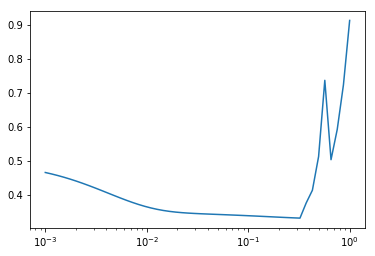

In [22]:
# FINC GAMMA (GD)
degree=1
tx=build_poly(trainX,degree)
initial_w=np.zeros((tx.shape[1],))
gammas=np.logspace(-3,0,50)
losses=[]
for gamma in gammas:
    w,loss=least_squares_GD(trainY,tx,initial_w,50,gamma)
    losses.append(loss)
plt.semilogx(gammas,losses)

In [23]:
# KEEP GAMMA
gamma=gammas[np.argmin(losses)]
print(gamma)

0.323745754282


In [24]:
# NOT TEST, EXAMPLE OF GD USE
initial_w=np.zeros((tx.shape[1],))
w,loss=least_squares_GD(trainY,tx,initial_w,max_iters,gamma)
print(loss)

0.330791360903


In [41]:
# NOT TEST, EXAMPLE OF LOG_GD USE
degree=1
tx=build_poly(tr_trainX,degree)
w,loss=logistic_regression(tr_trainY,tx,np.zeros((31,)),500,0.000006)
print(loss)

0.603731505047
0.494943791154
0.489209934087
0.487215356525
0.486447887518
0.486133953513


0.681085906315
0.520882605077
0.510732909958
0.50677020983
0.50409723741
0.634819170572
0.444036778691
0.434211955018
0.431102239229
0.429596062724
0.673095306313
0.485775127991
0.471688872681
0.466681427811
0.463759606942


c:\python35\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
c:\python35\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


inf
inf
inf
4.48811767739
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


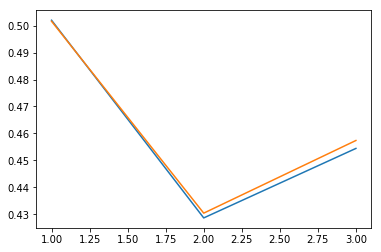

In [42]:
# NOT TEST, EXAMPLE OF REG_LOG_GD USE (DEGREE)
losses=[]
losses_te=[]
ws=[]
degrees=range(1,8)
for degree in degrees:
    tx=build_poly(tr_trainX,degree)
    tx_test=build_poly(tr_testX,degree)
    w,loss=logistic_regression(tr_trainY,tx,np.zeros((1+degree*30,)),500,0.0000006)
    losses.append(loss)
    ws.append(w)
    losses_te.append(compute_sig_loss2(tr_testY,tx_test,w))
plt.plot(degrees,losses)
plt.plot(degrees,losses_te)

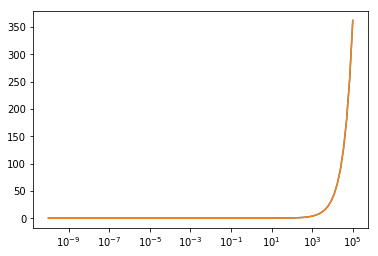

In [43]:
# NOT TEST, EXAMPLE OF REG_LOG_GD USE (LAMBDA)
degree=2
tx=build_poly(tr_trainX,degree)
tx_test=build_poly(tr_testX,degree)
losses=[]
losses_te=[]
ws=[]
lambdas=np.logspace(-10,5,100)
for lambda_ in lambdas:
    w,loss=reg_logistic_regression(tr_trainY,tx,lambda_,np.zeros((1+degree*30,)),100,0.0000000006)
    losses.append(loss)
    ws.append(w)
    losses_te.append(compute_sig_loss2(tr_testY,tx_test,w)+lambda_/2*np.linalg.norm(w))
plt.semilogx(lambdas,losses)
plt.semilogx(lambdas,losses_te)

In [44]:
# NOT TEST, EXAMPLE OF LEAST_SQUARES
w,loss=least_squares(trainY,trainX)
print(loss)

0.379950528954


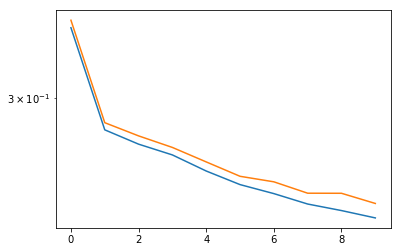

In [48]:
# higher degree give worst results
degrees=range(0,10)
losses=[]
losses_te=[]
for degree in degrees:
    tx=np.c_[build_poly(tr_trainX,degree),build_cross_poly(tr_trainX)[:,1:]]
    tx_trtest=np.c_[build_poly(tr_testX,degree),build_cross_poly(tr_testX)[:,1:]]
    w=np.zeros((tx.shape[1],))
    w,loss=least_squares(tr_trainY,tx)
    losses.append(loss)
    losses_te.append(compute_mse(tr_testY,tx_trtest,w))
plt.semilogy(degrees,losses)
plt.semilogy(degrees,losses_te)

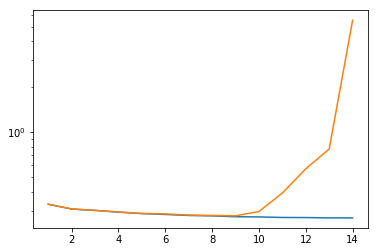

In [92]:
# EXAMPLE OF CROSS-VALIDATION WITH STD
## graph for report with mean and stds in this case
degrees=range(1,15)
seed = 1
k_fold = 4
lambdas= np.logspace(-10, 2, 50)
lambda_=0
k_indices = build_k_indices(trainY, k_fold, seed)


losses=[]
losses_te=[]
stds=[]

for degree in degrees:
    tx = build_poly(trainX,degree)
    #tx=np.c_[tx,tx2[:,1:]]
    temp_tr=[]
    temp_te=[]
    for k in range(k_fold):
        tr,te=cross_validation(trainY,tx,k_indices,k,lambda_)
        temp_tr.append(tr)
        temp_te.append(te)
    losses.append(np.mean(temp_tr))
    losses_te.append(np.mean(temp_te))
    stds.append(np.std(temp_te))
plt.semilogy(degrees,losses)
plt.semilogy(degrees,losses_te)

In [94]:
degree=degrees[np.argmin(losses_te)]

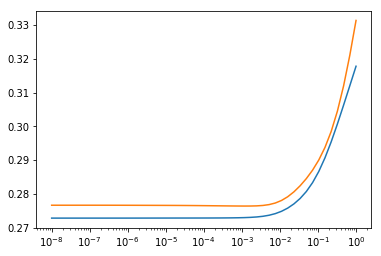

In [105]:
# EXAMPLE OF CROSS-VALIDATION WITH STD
degree=9
lambdas= np.logspace(-8, 0, 50)
k_indices = build_k_indices(trainY, k_fold, seed)


losses=[]
losses_te=[]
stds=[]
tx = build_poly(trainX,degree)

for lambda_ in lambdas:
    temp_tr=[]
    temp_te=[]
    for k in range(k_fold):
        tr,te=cross_validation(trainY,tx,k_indices,k,lambda_)
        temp_tr.append(tr)
        temp_te.append(te)
    losses.append(np.mean(temp_tr))
    losses_te.append(np.mean(temp_te))
    stds.append(np.std(temp_te))
plt.semilogx(lambdas,losses)
plt.semilogx(lambdas,losses_te)

In [106]:
lambda_=lambdas[np.argmin(losses_te)]
print(lambda_)

0.00115139539933


0.279343893498


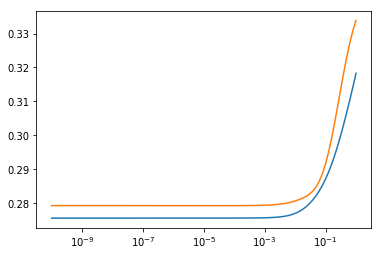

In [50]:
degree=8
tx=build_poly(tr_trainX,degree)
tx_trtest=build_poly(tr_testX,degree)
lambdas= np.logspace(-10, 0, 100)
losses=[]
losses_te=[]
ws=[]
for lambda_ in lambdas:
    w,loss=ridge_regression(tr_trainY,tx,lambda_)
    losses.append(loss)
    losses_te.append(compute_mse(tr_testY,tx_trtest,w))
    ws.append(w)
plt.semilogx(lambdas,losses)
plt.semilogx(lambdas,losses_te)
# pick lambda where losses_te is minimum
lambda_=lambdas[np.argmin(losses_te)]
w=ws[np.argmin(losses_te)]
print(np.min(losses_te))

In [107]:
tx=build_poly(trainX,degree)
w,loss=ridge_regression(trainY,tx,lambda_)
print(loss)

0.273140978882


In [108]:
# SUBMIT RIDGE REGRESSION
tx_test=build_poly(testX,degree)
ypred=predict_labels(w,tx_test)
create_csv_submission(idTest,ypred,"submission.csv")

In [41]:
# SUBMIT LOGISTIC
degree=1
tx_test=build_poly(testX,degree)
ypred=predict_labels_log(w,tx_test)
create_csv_submission(idTest,ypred,"submission_log.csv")

ValueError: shapes (568238,31) and (29,) not aligned: 31 (dim 1) != 29 (dim 0)

cross interaction tested but proven unsuccessfull

need to remove useless feature: some linear dependant

Baseline: random and show the difference in error and std

22 useless, 29 remove 0, remove outliers (3, 8, 13, 19?